# Linear regession with an online dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load a dataset
From: http://users.stat.ufl.edu/~winner/datasets.html

In [7]:
df = pd.read_csv('datasets/icecreamcone1.csv')

In [8]:
df.describe()

,dryBulb,relHum,coneStrng,coneWt
count,20.000000,20.00000,20.000000,20.000000
mean,28.800000,59.75000,23.685000,11.948000
std,2.166734,7.79254,6.541549,0.645907
min,23.000000,47.00000,14.500000,10.770000
25%,28.000000,53.50000,18.625000,11.602500
50%,29.000000,62.00000,22.950000,11.970000
75%,29.250000,63.00000,25.900000,12.095000
max,33.000000,78.00000,42.300000,13.400000


Features available:

|Feature|Description|
|-|-----------|
|dryBulb | Air temp |
|relHum | Humidity |
|coneWt | Cone weight |

Want to predict the cone strength (coneStrng)

In [15]:
data = df.rename_axis('').values
x1 = data[:, 0]
x2 = data[:, 1]
x3 = data[:, 3]
y = data[:, 2]

N = data.shape[0]
print('Number of data points = {}'.format(N))

Number of data points = 20


In [35]:
def scatter_plot(x, y, titles):
    """ Plot relationship between dependent variable & each feature.
    Hardcoded for 3 features.
    x: list of feature arrays
    """
    plt.figure(figsize=(10, 10)) 
    rows, cols = 2, 2
    for idx, x_i in enumerate(x): 
        plt.subplot(rows, cols, idx+1) 
        plt.scatter(x_i, y)
        plt.xlabel('$x_{}$'.format(idx), fontsize=16) 
        plt.ylabel('$y$', rotation=0, fontsize=16)
        plt.title(titles[idx])

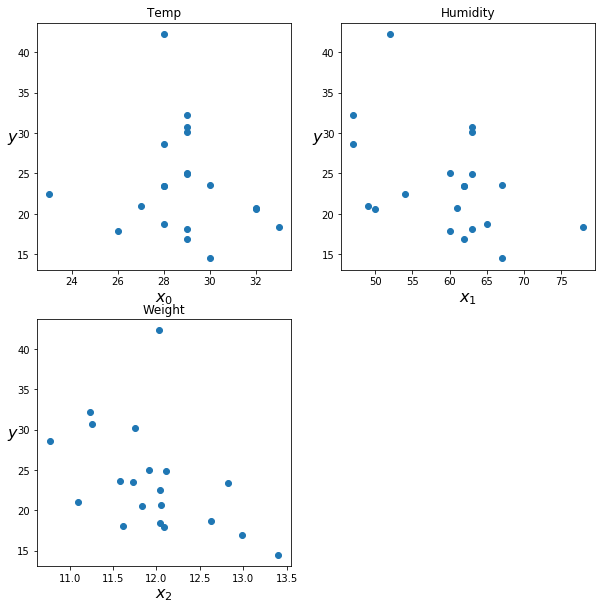

In [36]:
scatter_plot([x1, x2, x3], y, ['Temp', 'Humidity', 'Weight'])

## Build a linear model

In [16]:
import pymc3 as pm

In [53]:
model = pm.Model()
with model:
    # priors:
    beta_1 = pm.Normal('beta_1', mu=0, sd=10)
    beta_2 = pm.Normal('beta_2', mu=0, sd=10)
    beta_3 = pm.Normal('beta_3', mu=0, sd=10)
    alpha = pm.Normal('alpha', mu=0, sd=10)
    sd = pm.Exponential('sd', lam=1/10)
    
    # correlation coefficients:
    rb_1 = pm.Deterministic('rb_1', (beta_1 * x1.std() / y.std()) ** 2)
    rb_2 = pm.Deterministic('rb_2', (beta_2 * x2.std() / y.std()) ** 2)
    rb_3 = pm.Deterministic('rb_3', (beta_3 * x3.std() / y.std()) ** 2)
    
    mu = alpha + beta_1 * x1 + beta_2 * x2 + beta_3 * x3  # deterministic
    y_pred = pm.Normal('y_pred', mu=mu, sd=sd, observed=y)

In [54]:
with model:
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace = pm.sample(5000)

logp = -80.945, ||grad|| = 1.7428: 100%|██████████| 49/49 [00:00<00:00, 1998.76it/s]   
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The f

/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/s

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42e551eb50>,
      dtype=object)

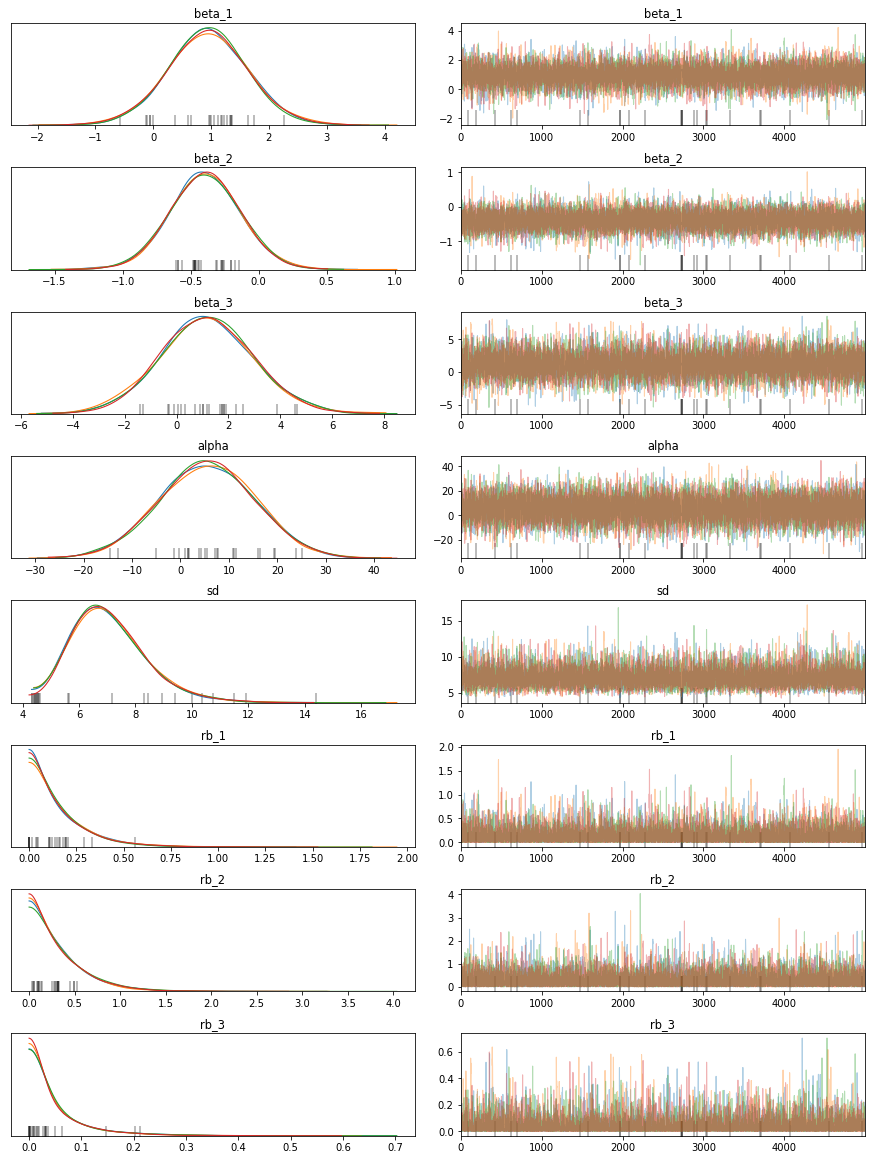

In [55]:
varnames = ['beta_1', 'beta_2', 'beta_3', 'alpha', 'sd', 'rb_1', 'rb_2', 'rb_3']
pm.traceplot(trace, varnames)

In [56]:
pm.summary(trace, varnames)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
beta_1,0.944,0.685,-0.343,2.256,0.007,0.005,10186.0,9376.0,10299.0,9986.0,1.0
beta_2,-0.392,0.257,-0.852,0.115,0.002,0.002,13776.0,11931.0,13914.0,12062.0,1.0
beta_3,1.187,1.798,-2.144,4.668,0.018,0.014,10293.0,8189.0,10366.0,9871.0,1.0
alpha,5.599,9.820,-12.730,24.027,0.088,0.073,12572.0,9155.0,12579.0,11465.0,1.0
sd,7.087,1.318,4.817,9.579,0.013,0.010,9586.0,9586.0,9022.0,6988.0,1.0
rb_1,0.149,0.164,0.000,0.438,0.002,0.001,9376.0,8641.0,10627.0,9956.0,1.0
rb_2,0.312,0.323,0.000,0.871,0.003,0.002,11931.0,10298.0,14295.0,12078.0,1.0
rb_3,0.045,0.065,0.000,0.160,0.001,0.001,8189.0,7891.0,9830.0,9670.0,1.0
